# **Partie A**



Importer , lire et découvrir les données

In [7]:
#Importation des bibliothèques
import pandas as pd
import numpy as np
import json



In [8]:
#monter les fichiers du drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#ouvrir le fichier et lire les données
data=open('/content/drive/MyDrive/Colab Notebooks/ABR.json','r')
lines=data.readlines()
data.close()

In [10]:
#7000 premieres lignes du dataset 
for i in range(7000):
    print(lines[i]) #list de tuples

Streaming output truncated to the last 5000 lines.
{"reviewerID": "A3APL6ZGP40QU9", "asin": "0002007770", "reviewerName": "Adventure Reader \"Don\"", "helpful": [1, 1], "reviewText": "I'm going to be careful here, because I don't want to spoil anything for potential readers.  Let me just say it is a great book, sometimes disturbing, but often funny and charming, or filled with action.  It also has a good bit of grit and tenacity in the main character.  It is a look inside a unique community that you wouldn't get a chance to view this close if you weren't being \"escorted\" by  one of their own.  You may be tempted to stop reading at some point if you are an excessively tender soul, however hang in there.  All you need to know for now is this, it is a fresh well-written book that you will love and ends in a good way so, have no fear of it and enjoy.", "overall": 5.0, "summary": "Surprising Twists and Turns - Well Researched", "unixReviewTime": 1333843200, "reviewTime": "04 8, 2012"}

{"

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B

---
asin - ID of the product, e.g. 0000013714

---


reviewerName - name of the reviewer

---
helpful - helpfulness rating of the review, e.g. 2/3

---
reviewText - text of the review

---
overall - rating of the product

---
summary - summary of the review

---
unixReviewTime - time of the review (unix time). 
***This count starts at the Unix epoch is 00:00:00 UTC on 1 January 1970.***

---
reviewTime - time of the review (raw) quand? La date

---

In [11]:
#création d'un dataframe de data
df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/ABR.json',lines=True,nrows=50000) #50000
df


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,"[0, 0]",Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""","[0, 2]",This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""","[0, 0]",This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,"[0, 0]",I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,"[7, 9]",A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"
...,...,...,...,...,...,...,...,...,...
49995,A2R2VN5X77D66O,0028633873,Donna H.,"[0, 0]",i gave this as a gift so i don't know how good...,5,bought as a gift,1402704000,"06 14, 2014"
49996,A38UCPTYS6LBHE,0028633873,"Lindsay Harrison ""film and book aficionado""","[22, 23]","I have been attempting to learn Hebrew, but I ...",5,For the Jew or the Goy,1051488000,"04 28, 2003"
49997,A2UENE1PINAKCT,0028633873,Marian E. Wells,"[0, 0]",Wanted to know more about Yiddish and this boo...,5,YIDDISH for a Gentile?,1388620800,"01 2, 2014"
49998,ALA77HERW2U0J,0028633873,Michael Peterson,"[1, 3]",While searching for a book that explains the Y...,5,This Yiddish book is a Feast for the Senses,1198627200,"12 26, 2007"



**BUT :** faire de la classification des opinions (indirectement, la classification de textes). On veut savoir, a` partir des revues effectu ́ees par un internaute sur des livres donn ́es, quelle serait l’opinion g ́en ́er ́ee par l’internaute sur un autre (ou nouveau) livre. Cette opinion correspond a` un certain d ́egr ́e de satisfaction variant entre 1 et 5. On suppose que plus le d ́egr ́e de satisfaction de l’internaute tend vers 5 plus on a des chances que le livre en question soit achet ́e par l’internaute.

Les scores 5 et 4 signifient que le livre est tr`es appr ́eci ́e par la personne, le score 3 plus ou moins appr ́eci ́e, et les scores 2 et 1 pas apprecié



1.  ** La moyenne de score de chaque livre**




In [12]:
#nombre de livres se trouvant dans dataset
df['asin'].unique().size

955

In [13]:
#ecart-type
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


overall           1.131311e+00
unixReviewTime    1.247542e+08
dtype: float64

In [14]:
df.nunique

<bound method DataFrame.nunique of                   reviewerID        asin  \
0      A10000012B7CGYKOMPQ4L  000100039X   
1             A2S166WSCFIFP5  000100039X   
2             A1BM81XB4QHOA3  000100039X   
3             A1MOSTXNIO5MPJ  000100039X   
4             A2XQ5LZHTD4AFT  000100039X   
...                      ...         ...   
49995         A2R2VN5X77D66O  0028633873   
49996         A38UCPTYS6LBHE  0028633873   
49997         A2UENE1PINAKCT  0028633873   
49998          ALA77HERW2U0J  0028633873   
49999         A1LH5914M6CLTH  0028633873   

                                          reviewerName   helpful  \
0                                                 Adam    [0, 0]   
1      adead_poet@hotmail.com "adead_poet@hotmail.com"    [0, 2]   
2                          Ahoro Blethends "Seriously"    [0, 0]   
3                                            Alan Krug    [0, 0]   
4                                             Alaturka    [7, 9]   
...                         

In [15]:
#moyenne de la dataset (ya la moyenne des overall et celle du unixReviewTime)
df.groupby('asin').agg(['mean'])

,overall,unixReviewTime
,mean,mean
asin,,
000100039X,4.674757,1.236713e+09
0001055178,3.555556,1.031966e+09
0001473123,4.625000,1.349109e+09
0001473727,5.000000,1.356048e+09
0001473905,4.666667,1.332288e+09
...,...,...
0028632613,3.722222,1.085054e+09
0028632753,2.400000,1.071153e+09


In [16]:
#restriction du DataFrame sur les deux colonnes qui nous interessent livres et ratings
df1=df[['asin','overall']]
df1

,asin,overall
0,000100039X,5
1,000100039X,5
2,000100039X,5
3,000100039X,5
4,000100039X,5
...,...,...
49995,0028633873,5
49996,0028633873,5
49997,0028633873,5
49998,0028633873,5


In [17]:
#dataFrame contenant le livre et la moyenne pondérée des appreciations QST1
df0=df1.groupby('asin').agg(['mean'])
df0

,overall
,mean
asin,
000100039X,4.674757
0001055178,3.555556
0001473123,4.625000
0001473727,5.000000
0001473905,4.666667
...,...
0028632613,3.722222
0028632753,2.400000


In [18]:
df0.iloc[2] #######test might delete later


overall  mean    4.625
Name: 0001473123, dtype: float64

In [19]:
df2=df1.groupby('asin').agg(['mean','max','min']) #ajout du min et max
df2

overall        
                mean max min
asin                        
000100039X  4.674757   5   1
0001055178  3.555556   5   2
0001473123  4.625000   5   1
0001473727  5.000000   5   5
0001473905  4.666667   5   3
...              ...  ..  ..
0028632613  3.722222   5   1
0028632753  2.400000   3   2
0028633504  4.625000   5   2
0028633784  4.428571   5   3
0028633873  4.625000   5   3

[955 rows x 3 columns]

In [20]:
#Matrice demandée 
col=df['asin'].unique()
df22 = pd.DataFrame(columns=col,index=range(1,6))
df22 = df2.transpose()
df22.append(pd.Series(name='Classe'))
df22.transpose()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


overall          
                mean  max  min
asin                          
000100039X  4.674757  5.0  1.0
0001055178  3.555556  5.0  2.0
0001473123  4.625000  5.0  1.0
0001473727  5.000000  5.0  5.0
0001473905  4.666667  5.0  3.0
...              ...  ...  ...
0028632613  3.722222  5.0  1.0
0028632753  2.400000  3.0  2.0
0028633504  4.625000  5.0  2.0
0028633784  4.428571  5.0  3.0
0028633873  4.625000  5.0  3.0

[955 rows x 3 columns]

In [21]:
S=df22.iloc[0].size
S

955

In [22]:
#Identification des livres les mieux appréciés : Apprécié - Plus au moins Apprécié - Non apprécié
def appreciation(D):
  for j in D.columns:
      if D.iloc[0][j]>3.5:
            D.loc[-1,j]='Apprécié'
      elif D.iloc[0][j]<2.5:
            D.loc[-1,j]='Non Apprécié'  
      else:
            D.loc[-1,j]='Plus au Moins Apprécié'   
  return D

In [23]:
appreciation(df22)

asin         000100039X 0001055178 0001473123 0001473727 0001473905  \
overall mean   4.674757   3.555556      4.625        5.0   4.666667   
        max         5.0        5.0        5.0        5.0        5.0   
        min         1.0        2.0        1.0        5.0        3.0   
-1             Apprécié   Apprécié   Apprécié   Apprécié   Apprécié   

asin         0001712772 000171287X 0001714538 0002005395 0002006715  ...  \
overall mean   4.666667   4.583333   3.714286   4.071429        4.6  ...   
        max         5.0        5.0        5.0        5.0        5.0  ...   
        min         1.0        3.0        1.0        3.0        3.0  ...   
-1             Apprécié   Apprécié   Apprécié   Apprécié   Apprécié  ...   

asin         0028631919 002863196X 002863201X 0028632028 0028632346  \
overall mean   4.444444   4.615385   4.454545   4.333333   4.714286   
        max         5.0        5.0        5.0        5.0        5.0   
        min         1.0        2.0        2.0        2.0        4.0   
-1             Apprécié   Apprécié   Apprécié   Apprécié   Apprécié   

asin         0028632613    0028632753 0028633504 0028633784 0028633873  
overall mean   3.722222           2.4      4.625   4.428571      4.625  
        max         5.0           3.0        5.0        5.0        5.0  
        min         1.0           2.0        2.0        3.0        3.0  
-1             Apprécié  Non Apprécié   Apprécié   Apprécié   Apprécié  

[4 rows x 955 columns]

In [24]:
df22.rename(index = {-1: 'Classe'},inplace = True)
df22.transpose()

overall                  Classe
                mean  max  min              
asin                                        
000100039X  4.674757  5.0  1.0      Apprécié
0001055178  3.555556  5.0  2.0      Apprécié
0001473123     4.625  5.0  1.0      Apprécié
0001473727       5.0  5.0  5.0      Apprécié
0001473905  4.666667  5.0  3.0      Apprécié
...              ...  ...  ...           ...
0028632613  3.722222  5.0  1.0      Apprécié
0028632753       2.4  3.0  2.0  Non Apprécié
0028633504     4.625  5.0  2.0      Apprécié
0028633784  4.428571  5.0  3.0      Apprécié
0028633873     4.625  5.0  3.0      Apprécié

[955 rows x 4 columns]

In [25]:
df22.transpose().iloc[:,3]

asin
000100039X        Apprécié
0001055178        Apprécié
0001473123        Apprécié
0001473727        Apprécié
0001473905        Apprécié
                  ...     
0028632613        Apprécié
0028632753    Non Apprécié
0028633504        Apprécié
0028633784        Apprécié
0028633873        Apprécié
Name: (Classe, ), Length: 955, dtype: object

In [26]:
#Les livres les nons appréciés de scores < 4
df3=df1.groupby('asin').agg(['mean'])
df3=df3[df3>=4]
df3.fillna('Moins Apprecié')


,overall
,mean
asin,
000100039X,4.674757
0001055178,Moins Apprecié
0001473123,4.625
0001473727,5.0
0001473905,4.666667
...,...
0028632613,Moins Apprecié
0028632753,Moins Apprecié


In [27]:
#les livres les plus appréciés de score >=3.5
df3=df1.groupby('asin').agg(['mean'])
df3=df3[df3<3.5]
df3.fillna('Un des plus apprecié')

,overall
,mean
asin,
000100039X,Un des plus apprecié
0001055178,Un des plus apprecié
0001473123,Un des plus apprecié
0001473727,Un des plus apprecié
0001473905,Un des plus apprecié
...,...
0028632613,Un des plus apprecié
0028632753,2.4


In [28]:
#Le 1er quart des livres les plus appréciés 
df4=df1.groupby('asin').agg(['mean']).transpose()    
df4=df4.iloc[0].sort_values(ascending=False)           #tri du dataframe suivant le score d'appreciation
df4.head(len(df4)//4)


asin
000735018X    5.0
0007202474    5.0
0007160003    5.0
0028609891    5.0
0007268939    5.0
             ... 
0020285604    4.6
0028631137    4.6
0002713624    4.6
0028617436    4.6
0007267142    4.6
Name: (overall, mean), Length: 238, dtype: float64

In [29]:
#Comparaison lequel des deux est plus apprécié 
def comparaison(i,j):
 if df0.iloc[i][0] > df0.iloc[j][0]:
   return df0.iloc[i]
 return df0.iloc[j] 

In [30]:
df0.head(9) # affichage pour utilisation dans l'exemple qui suit


,overall
,mean
asin,
000100039X,4.674757
0001055178,3.555556
0001473123,4.625000
0001473727,5.000000
0001473905,4.666667
0001712772,4.666667
000171287X,4.583333
0001714538,3.714286


In [31]:
print(comparaison(0,1)) # tests de la fonction de comparaison
comparaison(7,2)

overall  mean    4.674757
Name: 000100039X, dtype: float64


overall  mean    4.625
Name: 0001473123, dtype: float64

**5) Est-ce que l’utilisation des comparaisons de scores moyennes est toujours une bonne façon de faire pour répondre à ces questions? Sinon, quels sont les alternatives?**


L'utilisation de ces scores moyens n'est pas suffisante pour juger la qualité d'un livre vu que plusieurs critères entrent en jeu à savoir : **le nombre de reviews que l'on a** ,**la confiance que l'on a envers les lecteurs qu'ils ont apprecié** , **le nombre de livres qu'ils ont déjà lus**, **aussi le temps de rating si ceci est fait long time ago ou c'est récent** .....


*tout ceci doit être pris en considération*

Des representations graphiques pourront nous être utiles.




**Une boîte à moustaches se compose de 5 choses.**



1.   Le minimum
2.   Premier quartile ou 25 %
3.   Médiane (deuxième quartile) ou 50 %
4.   Troisième quartile ou 75 %
5.   Maximum



In [32]:
import matplotlib.pyplot as plt #importer la biblio matplotlib
%matplotlib inline

In [33]:
df0.iloc[1][0]        #test   

3.5555555555555554

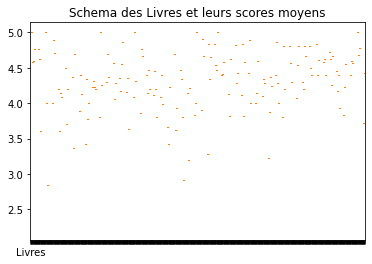

In [34]:
#la boite à moustaches

plt.boxplot(df0.overall) ; plt.title("Schema des Livres et leurs scores moyens") ;

plt.gca().xaxis.set_ticklabels(['Livres']) ; plt.show()

# Cette dernière ligne plt.gca() permet d'ajouter des étiquettes aux boîtes


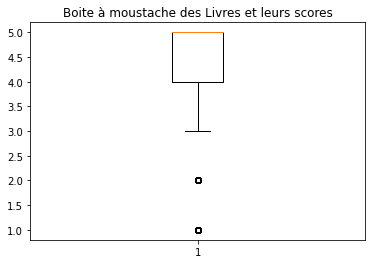

In [35]:
plt.boxplot(df1.overall) ; plt.title("Boite à moustache des Livres et leurs scores") ; 

#Une representation significative car la plus part des livres sont appréciés
#Non homogène
#Distribution non homogène

In [36]:
df['asin'].unique() #test qui affiche les noms des livres sur lequels on travaille

array(['000100039X', '0001055178', '0001473123', '0001473727',
       '0001473905', '0001712772', '000171287X', '0001714538',
       '0002005395', '0002006715', '0002007649', '0002007770',
       '0002008572', '0002051850', '0002111306', '0002113570',
       '0002117088', '0002153211', '0002154129', '0002154463',
       '000215725X', '0002157330', '0002158388', '000215949X',
       '0002178559', '0002179911', '0002185385', '000221685X',
       '0002216973', '000221735X', '0002219417', '0002221020',
       '0002222590', '000222383X', '0002226618', '0002226901',
       '0002232529', '0002239221', '000224053X', '0002242052',
       '0002243768', '0002246325', '0002247399', '0002250357',
       '0002250519', '0002251337', '0002252015', '0002257858',
       '0002310899', '0002311216', '0002315963', '0002318075',
       '0002318652', '0002444763', '0002550296', '0002550938',
       '0002551489', '0002551543', '0002553708', '000255383X',
       '0002554755', '0002555166', '0002555328', '00025

In [37]:
#for i in range(46):
  #for j in range(5):
((df['asin'].unique()[1] and df['overall']==5)== True).count()

50000

In [38]:
pd.value_counts(df1['asin']) # test pour savoir le nombre d'occurence de chaque book

0007444117    3821
0007442920    3599
0007386648    3170
0002007770    2721
0002247399    2054
              ... 
0007212712       5
0025473905       5
0025483358       5
0007209053       5
0007318979       5
Name: asin, Length: 955, dtype: int64

In [39]:
pd.value_counts(df['overall'])     #plus

5    28208
4    11163
3     5448
2     2853
1     2328
Name: overall, dtype: int64

In [40]:
#df0=df1[df1['asin'] =='000222383X']
#df0
for i in range(50):
   print(df1.iloc[i][0])


000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X
000100039X


In [41]:
for i in range(len(df)): #pour pouvoir utiliser comme feature la colonne helpful on la convertit en int
    if (df['helpful'][i][1]!=0):
       df['helpful'][i]=df['helpful'][i][0]/df['helpful'][i][1]
    else:
       df['helpful'][i]=0
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A10000012B7CGYKOMPQ4L,000100039X,Adam,0,Spiritually and mentally inspiring! A book tha...,5,Wonderful!,1355616000,"12 16, 2012"
1,A2S166WSCFIFP5,000100039X,"adead_poet@hotmail.com ""adead_poet@hotmail.com""",0.0,This is one my must have books. It is a master...,5,close to god,1071100800,"12 11, 2003"
2,A1BM81XB4QHOA3,000100039X,"Ahoro Blethends ""Seriously""",0,This book provides a reflection that you can a...,5,Must Read for Life Afficianados,1390003200,"01 18, 2014"
3,A1MOSTXNIO5MPJ,000100039X,Alan Krug,0,I first read THE PROPHET in college back in th...,5,Timeless for every good and bad time in your l...,1317081600,"09 27, 2011"
4,A2XQ5LZHTD4AFT,000100039X,Alaturka,0.777778,A timeless classic. It is a very demanding an...,5,A Modern Rumi,1033948800,"10 7, 2002"
...,...,...,...,...,...,...,...,...,...
49995,A2R2VN5X77D66O,0028633873,Donna H.,0,i gave this as a gift so i don't know how good...,5,bought as a gift,1402704000,"06 14, 2014"
49996,A38UCPTYS6LBHE,0028633873,"Lindsay Harrison ""film and book aficionado""",0.956522,"I have been attempting to learn Hebrew, but I ...",5,For the Jew or the Goy,1051488000,"04 28, 2003"
49997,A2UENE1PINAKCT,0028633873,Marian E. Wells,0,Wanted to know more about Yiddish and this boo...,5,YIDDISH for a Gentile?,1388620800,"01 2, 2014"
49998,ALA77HERW2U0J,0028633873,Michael Peterson,0.333333,While searching for a book that explains the Y...,5,This Yiddish book is a Feast for the Senses,1198627200,"12 26, 2007"


In [42]:
dfdf=df.groupby('asin').agg(['mean'])
dfdf

,helpful,overall,unixReviewTime
,mean,mean,mean
asin,,,
000100039X,0.413828,4.674757,1.236713e+09
0001055178,0.462963,3.555556,1.031966e+09
0001473123,0.207386,4.625000,1.349109e+09
0001473727,0.571429,5.000000,1.356048e+09
0001473905,0.333333,4.666667,1.332288e+09
...,...,...,...
0028632613,0.642374,3.722222,1.085054e+09
0028632753,0.485714,2.400000,1.071153e+09


In [43]:
#Standariser les données 
from sklearn.preprocessing import StandardScaler
features = ['overall' ,'helpful','unixReviewTime']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['asin']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[ 0.70591401, -0.8925649 ,  0.49791898],
       [ 0.70591401, -0.8925649 , -1.78270921],
       [ 0.70591401, -0.8925649 ,  0.77356125],
       ...,
       [ 0.70591401, -0.8925649 ,  0.76248016],
       [ 0.70591401, -0.1230708 , -0.76047805],
       [-1.0619648 , -0.56278171, -0.89691405]])

In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['1ère composante principale ', ' 2ème composante principale'])
print(principalDf)
#principalDf.iloc[0:,].plot.scatter(x='1ère composante principale ',y=' 2ème composante principale')

       1ère composante principale    2ème composante principale
0                        -1.117253                    -0.530049
1                         0.413008                    -1.278282
2                        -1.302204                    -0.439616
3                        -0.909996                    -0.631389
4                         1.889383                    -1.321863
...                            ...                          ...
49995                    -1.370515                    -0.406214
49996                     2.088418                    -1.263299
49997                    -1.294769                    -0.443251
49998                     0.274203                    -0.919711
49999                     0.425184                     0.691447

[50000 rows x 2 columns]


In [45]:
from scipy.stats import pearsonr
dff=df.groupby('asin').agg(['mean'])
corr, _ = pearsonr(dff.iloc[:,0], dff.iloc[:,1])
corr

0.013934153443031738

In [46]:
#il faut une colonne avec les deux classes apprécié et non apprécié
finalDf = pd.concat([principalDf, df1[['asin']]], axis = 1)
finalDf = finalDf.groupby('asin').agg(['mean'])
finalDf

,1ère composante principale,2ème composante principale
,mean,mean
asin,,
000100039X,0.261980,-0.542506
0001055178,1.652055,-0.143468
0001473123,-0.672115,-0.219760
0001473727,-0.181701,-0.489149
0001473905,-0.382680,-0.290006
...,...,...
0028632613,1.629981,-0.130468
0028632753,1.693602,0.925581


In [47]:
finalDf.iloc[:,1]

asin
000100039X   -0.542506
0001055178   -0.143468
0001473123   -0.219760
0001473727   -0.489149
0001473905   -0.290006
                ...   
0028632613   -0.130468
0028632753    0.925581
0028633504   -0.769001
0028633784   -0.498850
0028633873   -0.355888
Name: ( 2ème composante principale, mean), Length: 955, dtype: float64

In [48]:
FinalDF=finalDf.groupby('asin').agg(['mean'])
FinalDF=pd.concat([finalDf, df22.transpose().iloc[:,3]], axis = 1)

#FinalDF.rename(columns = {('1ère composante principale' , 'mean'):('Z', '100')}, inplace=True)
FinalDF

,1ère composante principale,2ème composante principale,Classe
,mean,mean,
asin,,,
000100039X,0.261980,-0.542506,Apprécié
0001055178,1.652055,-0.143468,Apprécié
0001473123,-0.672115,-0.219760,Apprécié
0001473727,-0.181701,-0.489149,Apprécié
0001473905,-0.382680,-0.290006,Apprécié
...,...,...,...
0028632613,1.629981,-0.130468,Apprécié
0028632753,1.693602,0.925581,Non Apprécié


In [49]:
svp=pd.DataFrame(data=FinalDF,columns=['1ère composante principale','2ème composante principale','target'])
svp['1ère composante principale']=FinalDF[('1ère composante principale ', 'mean')]
svp['2ème composante principale']=FinalDF[(' 2ème composante principale', 'mean')]
svp['target']=FinalDF['Classe']
svp

,1ère composante principale,2ème composante principale,target
asin,,,
000100039X,0.261980,-0.542506,Apprécié
0001055178,1.652055,-0.143468,Apprécié
0001473123,-0.672115,-0.219760,Apprécié
0001473727,-0.181701,-0.489149,Apprécié
0001473905,-0.382680,-0.290006,Apprécié
...,...,...,...
0028632613,1.629981,-0.130468,Apprécié
0028632753,1.693602,0.925581,Non Apprécié
0028633504,1.233995,-0.769001,Apprécié


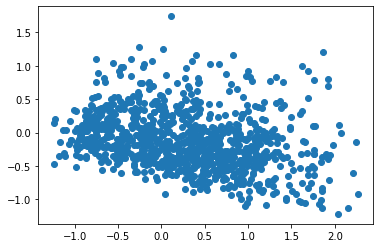

In [50]:
x=finalDf.iloc[:,0]
y=finalDf.iloc[:,1]
plt.scatter(x, y)

plt.show()

In [51]:
#df.groupby('asin').agg(['mean']).plot.scatter(x='overall',y='helpful')
pca.explained_variance_

array([1.36180841, 1.00875131])

In [52]:
#attribut du modèle pca pour retrouver le % de variance expliqué par chauqe composante
pca.explained_variance_ratio_ # les deux axes expliquent de manière quasi egale l'information

array([0.45392706, 0.33624371])

In [53]:
pca.explained_variance_ratio_.cumsum()# 78%  de la variance totale est conservée

array([0.45392706, 0.79017077])

In [54]:
pca.n_components_

2

([<matplotlib.axis.XTick at 0x7ff0984e8bd0>,
 <a list of 2 Text major ticklabel objects>)

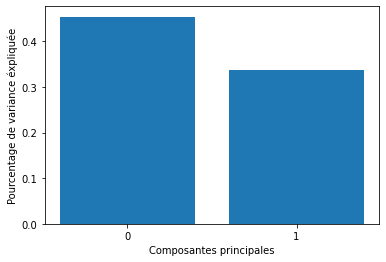

In [55]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_ )
plt.xlabel('Composantes principales')
plt.ylabel('Pourcentage de variance éxpliquée')
plt.xticks(range(pca.n_components_))

In [56]:
pca.components_ #composants principaux au niveau de chaque axe

array([[-0.21045562,  0.71097884, -0.6709825 ],
       [-0.94416813,  0.03014416,  0.32808211]])

càd : comp 1 = -0.21045562 * overall + 0.71097884 * unixReviewTime -0.6709825 * helpful

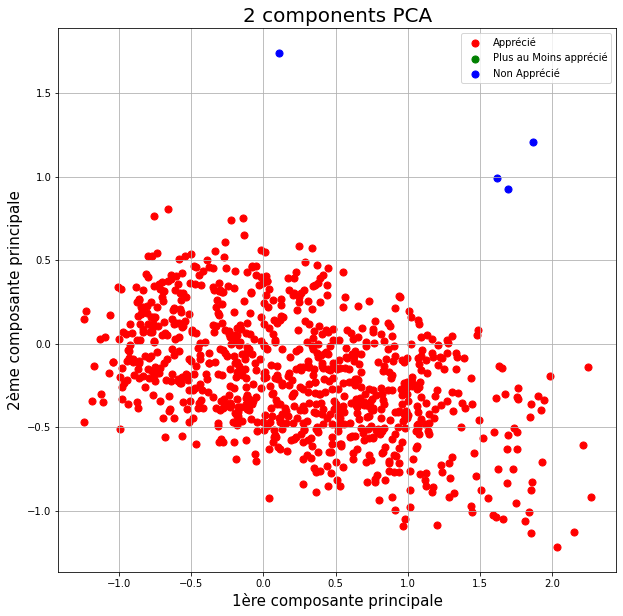

In [57]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(('1ère composante principale'), fontsize = 15)
ax.set_ylabel(('2ème composante principale'), fontsize = 15)
ax.set_title('2 components PCA', fontsize = 20)
targets = ['Apprécié', 'Plus au Moins apprécié','Non Apprécié']
colors = ['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = svp['target'] == target
    ax.scatter(svp.loc[indicesToKeep, '1ère composante principale'], svp.loc[indicesToKeep, '2ème composante principale'], c = color, s = 50)
ax.legend(targets)
ax.grid()

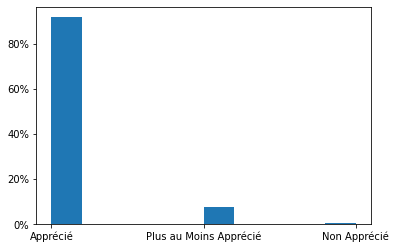

In [58]:
from matplotlib.ticker import PercentFormatter
plt.hist(svp['target'], weights=np.ones(len(svp['target'])) / len(svp['target']))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [59]:
from pandas.core.indexes.period import DatetimeIndex
from datetime import datetime

df_T= df[['asin','reviewTime','overall','helpful']]
df_T['reviewTime']=pd.to_datetime(df_T['reviewTime'])
index=DatetimeIndex(df_T['reviewTime'])
df_T['Month'] = df_T['reviewTime'].dt.month
df_T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,asin,reviewTime,overall,helpful,Month
0,000100039X,2012-12-16,5,0,12
1,000100039X,2003-12-11,5,0.0,12
2,000100039X,2014-01-18,5,0,1
3,000100039X,2011-09-27,5,0,9
4,000100039X,2002-10-07,5,0.777778,10
...,...,...,...,...,...
49995,0028633873,2014-06-14,5,0,6
49996,0028633873,2003-04-28,5,0.956522,4
49997,0028633873,2014-01-02,5,0,1
49998,0028633873,2007-12-26,5,0.333333,12


In [60]:
def df_mois(i):
  Mois=df_T['Month']
  D=df_T.where(Mois==i).dropna()
  return D

In [61]:
df_mois(1)

,asin,reviewTime,overall,helpful,Month
2,000100039X,2014-01-18,5.0,0,1.0
5,000100039X,2014-01-27,5.0,0,1.0
8,000100039X,2014-01-29,5.0,0,1.0
10,000100039X,2009-01-15,5.0,0,1.0
14,000100039X,2013-01-23,5.0,1.0,1.0
...,...,...,...,...,...
49970,0028633504,2009-01-07,2.0,0.666667,1.0
49975,0028633504,2007-01-06,5.0,0.714286,1.0
49984,0028633504,2006-01-12,5.0,1.0,1.0
49985,0028633784,2002-01-09,3.0,0.75,1.0


In [62]:
for i in range(1,13):
  L=['','Janvier','Février','Mars','Avril','Mai','Juin','Juillet','Aout','Septembre','Octobre','Novembre','Décembre']
  print(L[i],df_mois(i))


Janvier              asin reviewTime  overall   helpful  Month
2      000100039X 2014-01-18      5.0         0    1.0
5      000100039X 2014-01-27      5.0         0    1.0
8      000100039X 2014-01-29      5.0         0    1.0
10     000100039X 2009-01-15      5.0         0    1.0
14     000100039X 2013-01-23      5.0       1.0    1.0
...           ...        ...      ...       ...    ...
49970  0028633504 2009-01-07      2.0  0.666667    1.0
49975  0028633504 2007-01-06      5.0  0.714286    1.0
49984  0028633504 2006-01-12      5.0       1.0    1.0
49985  0028633784 2002-01-09      3.0      0.75    1.0
49997  0028633873 2014-01-02      5.0         0    1.0

[5549 rows x 5 columns]
Février              asin reviewTime  overall   helpful  Month
13     000100039X 2001-02-28      5.0         0    2.0
18     000100039X 2012-02-15      5.0       1.0    2.0
21     000100039X 2001-02-24      5.0  0.666667    2.0
42     000100039X 2012-02-08      5.0       1.0    2.0
52     000100039X 2013-0

In [63]:
Mois1=df_mois(1).groupby('asin').agg(['mean'])
Mois1

,reviewTime,overall,helpful,Month
,mean,mean,mean,mean
asin,,,,
000100039X,2010-03-14 22:09:13.846153728,4.730769,0.445791,1.0
0001055178,2001-01-14 16:00:00.000000000,3.333333,0.500000,1.0
0001473123,2013-07-18 12:00:00.000000000,5.000000,0.500000,1.0
0001712772,2013-01-06 00:00:00.000000000,5.000000,0.000000,1.0
0001714538,2001-01-22 00:00:00.000000000,5.000000,1.000000,1.0
...,...,...,...,...
0028632346,2001-01-08 00:00:00.000000000,5.000000,0.968750,1.0
0028632613,2003-07-18 12:00:00.000000000,2.500000,0.598039,1.0


In [64]:
Mois1

,reviewTime,overall,helpful,Month
,mean,mean,mean,mean
asin,,,,
000100039X,2010-03-14 22:09:13.846153728,4.730769,0.445791,1.0
0001055178,2001-01-14 16:00:00.000000000,3.333333,0.500000,1.0
0001473123,2013-07-18 12:00:00.000000000,5.000000,0.500000,1.0
0001712772,2013-01-06 00:00:00.000000000,5.000000,0.000000,1.0
0001714538,2001-01-22 00:00:00.000000000,5.000000,1.000000,1.0
...,...,...,...,...
0028632346,2001-01-08 00:00:00.000000000,5.000000,0.968750,1.0
0028632613,2003-07-18 12:00:00.000000000,2.500000,0.598039,1.0
